# Projet numérique III : câble sous marin

# I - Questions théoriques

1. La loi des grands nombres nous autorise à approcher l'espérance conditionnelle par la moyenne empirique des simulations conditionnelles.

2. On pose $ Z' = (Z_I,Z_C)=(Z(x_{j_1},...x_{j_n},x_0,...x_N))$,
où les composantes de $ Z_C $ ne répètent pas celles de $ Z_I $ :

$$Z_I = (x{j_i},i \in[1,n]), Z_C = (x_i, i \in([0,N] \backslash (j_k,k \in[1,n]))) $$

On ré-indexe les différents $ (x_i, i \in[0,N]) $ en l'ensemble $ (x'_i, i \in[0,N]) $ tel que l''on puisse écrire $ Z' = (Z(x_i'), i \in[0,N]) $.

On applique alors la formule sur la fonction de répartition conditionnelle des vecteurs gaussiens à $ Z'=(Z_I,Z_C) $ :

$$ f_{Z_I | Z_C = z_C}(z_I) = \frac{1}{(2\pi)^{N-n+2}\sqrt{det(CS_{Z_I})}}exp(-\frac{1}{2}(z_I-\psi(z_C))^TCS_{Z_I}^{-1}(z_I-\psi(z_C))) $$,

où $z_C=(z(x_{j_i}),i \in [1,N]) $, $ C_{Z_I}= Cov(Z_I,Z_I) $, $ C_{Z_C}=Cov(Z_C,Z_C) $, $ C_{Z_I,Z_C}=Cov(Z_I,Z_C) $,

$ C_{Z_C,Z_I}=Cov(Z_C,Z_I) $, $ CS_{Z_I}=C_{Z_I}-C_{Z_I,Z_C}C_{Z_C}^{-1}C_{Z_C,Z_I} $, et $ \psi(Z_C)=E(Z_I|Z_C)$.

3. On note $ R = \begin{pmatrix} r_{11} &\dots & r_{1n} \\ \vdots & \ddots & \vdots \\ r_{n1} & \dots & r_{nn} \end{pmatrix} $,

alors $ (m+RY)_i=\sum_{j=1}^pr_{ij}*Y_j +m_i $ qui est bien une loi gaussienne (somme de lois gaussiennes indépendantes).

Soient $ \lambda $ et $ \mu \in R, i_1, i_2 \in [1,n] $, alors $ \lambda(m+RY)_{i_1}+mu(m+RY)_{i_2}=\lambda*m_{i_1}+\mu*m_{i_2}+\sum_{j=1}^p(\lambda*r_{i_1j}+\mu*r_{i_2j})*Y_j $ qui suit bien une loi gaussienne (somme de lois gaussiennes indépendantes). $ Z $ est alors un vecteur gaussien.

$ V(Z)=E((Z-E(Z))*(Z-E(Z))^T) = E(RY*(RY)^T)=E(RYY^TR^T)=RE(YY^T)R^T=RR^T $, définie positive car R est inversible.

Si $ i\neq j, E(Y_i*Y_j)=E(Y_i)*E(Y_j)=0 $

Si $i=j, E(Y_i^2)=V(Y_i)=1 $

4. Ainsi, en posant $ m = E(Z_I|Z_C=z) $ et $ R $ telle que $ RR^T=V(Z_I/Z_C=z) $, on peut simuler $ {Z_I}_{Z_C=z} $ en générant $ Y $ et en calculant $ m+RY $.

# II - Implémentation

Importation des dépendances

In [47]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt 
import random as rd
import math

Définition des paramètres de la simulation

In [48]:
A=0
B=500
N=101 #nombre de points de discrétisation

Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization= discretization_indexes*Delta

mu=-5
a=50
sigma2=12

observation_indexes=[0,20,40,60,80,100]
depth=np.array([0,-4,-12.8,-1,-6.5,0])

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

n=len(unknown_indexes)

In [49]:
#question 1 :
def cov(d,a,sigma2): #permet de créer la matrice de covariance à partir d'une matrice de distance
    return sigma2*np.exp(-abs(d)/a)

In [50]:
#question 2 :
D=np.array([[abs(i-j)*Delta for j in discretization_indexes] for i in discretization_indexes])

In [51]:
#question 3 : 
Z=cov(D,a,sigma2)

In [52]:
# question 4 :

# Matrice de covariance entre les observations, et son inverse
D_observation=np.array([[abs(i-j)*Delta for j in observation_indexes] for i in observation_indexes])
Z_observation=cov(D_observation,a,sigma2)

Z_observation_inv=np.linalg.inv(Z_observation)

# Matrice de covariance entre les observations et les inconnues
D_observation_unknown=np.array([[abs(i-j)*Delta for j in unknown_indexes] for i in observation_indexes])
Z_observation_unknown=cov(D_observation_unknown,a,sigma2)

# Matrice de covariance entre les inconnues et les observations
Z_unknown_observation = Z_observation_unknown.T

# Matrice de covariance entre les inconnues
D_unknown=np.array([[abs(i-j)*Delta for j in unknown_indexes] for i in unknown_indexes])
Z_unknown=cov(D_unknown,a,sigma2)

Question 5 :
On commence par créer un générateur de nombre suivant une loi normale centrée réduite par la méthode de Box-Muller.

In [53]:
def normale(): 
    x=rd.random()
    y=rd.random()
    return math.sqrt(-math.log(x))*math.cos(2*math.pi*y)

def vnormale(n):#renvoie un vecteur contenant n loi centrées réduites
    return np.array([normale() for i in range (n)])


On note $Y$ la variable qui représente les profondeurs inconnues et $Z$ celles des profondeurs obervées.
$Z_c$ est le vecteur des observations.

$Y_{|Z=Z_c}$ suit une loi normale d'esperance $µ+C_{Y,Z}C_Z^{-1}(Z_c - µ)$ et de matrice de covariance $CS_Y=C_Y − C_{Y,Z}C_Z^{−1}C_{Z,Y}$ où $C_Y$,$C_Z$ et $C_{Z,Y}$ sont respectivement les matrices de covariances pour les inconnues, les observations et entre observations et inconnues.

On simule $Y$ sachant $Z=Z_c$ en simulant une loi normale centrée réduite grâce à la question précédente. On la transforme alors en loi normale ayant les bons paramètres. Pour cela il faut prendre la décomposition de Cholesky de la matrice de covariance que l'on appelle $R$.

In [54]:
def var(depth,pas,observation_indexes): #retourne un vecteur qui suit la loi Y sachant Z=Zc
    R=np.linalg.cholesky(Z_unknown - np.dot(np.dot(np.transpose(Z_observation_unknown),np.linalg.inv(Z_observation)),Z_observation_unknown))
    vmu_u=np.array([mu for i in range(n)])
    vmu_o=np.array([mu for i in range(len(observation_indexes))])
    vesp=vmu_u+np.dot(np.dot(np.transpose(Z_observation_unknown),np.linalg.inv(Z_observation)),depth-vmu_o)
    return vesp + np.dot(R,vnormale(n))

On veut estimer l'espérance de profondeurs inconnues en sachant les profondeurs observées. 
L'espérance s'estime à partir de moyennes pour plusieures simulations.

In [55]:
def esperance(m=1): #renvoie une estimation de l'esperance de par la moyenne de m simulations
    S=np.zeros(n)
    for i in range(m):
        S=S+var(depth,Delta,observation_indexes)
    return S/m

On représente maintenant les résultats de la simulation.

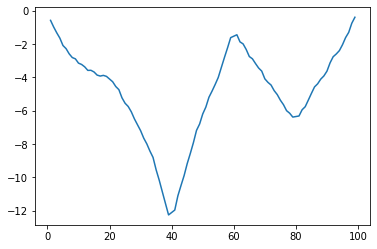

In [56]:
#affichage
def affichage(m=1):
    plt.plot(unknown_indexes,esperance(m))
    plt.show()
    
affichage(100)

On peut également appliquer la formule donnant l'espérance conditonnelle de $Y$ en fonction de $Z_{C}$

[]

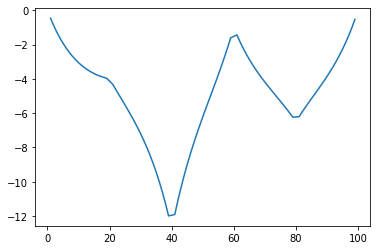

In [93]:
E_Y = mu + Z_unknown_observation.dot(Z_observation_inv).dot(depth-mu)


plt.plot(unknown_indexes,E_Y)
plt.plot()

Question 6 : La matrice de variance conditionnelle $CS_Y$ représente

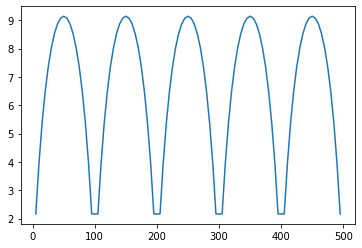

In [96]:
CSY = Z_unknown - Z_unknown_observation.dot(Z_observation_inv).dot(Z_observation_unknown)

L_var = [CSY[i,i] for i in range (len(unknown_indexes))]

L_position = [index*5 for index in unknown_indexes]

plt.plot(L_position,L_var)
plt.show()

On observe que la variance (et donc l'incertitude sur la profondeur) est d'autant plus grande que l'on est situé loin d'un point de mesure. Cela semble cohérent : à proximité des points de mesure, la profondeur est très proche de la valeure mesurée à côté, et est donc connue avec une bonne précision. Au contraire, lorsque l'on s'éloigne des points de mesure, la profondeur est moins liée à la profondeur mesurée, ce qui fait que la variance conditionnelle est élevée (à 9m^2, alors que la variance non conditionnnelle est à 12m^2).

Question 7 :
On affiche sur le même graphique la simulation et les observations.

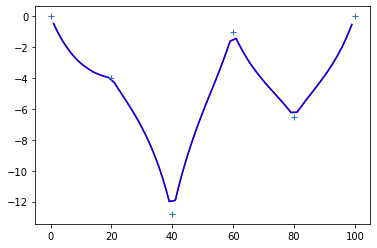

In [100]:
def affichage_mixte(m=1):
    plt.plot(unknown_indexes,esperance(m),'r')
    plt.plot(unknown_indexes,E_Y,'b')
    plt.plot(observation_indexes,depth,'+')
    plt.show()
    
affichage_mixte(10000)

On remarque que pour un grand nombre de simulations, les observations tendent à être reliées par des droites. Sur toutes les configurations possibles, en moyenne il n'y aura pas de pic intermédiaire et cela a tendance à lisser la courbe.
La moyenne des espérances simulées est également très proche de l'espérance conditonnelle, ce qui est en cohérence avec la loi des grands nombres.

Par exemple en prennant peu d'étapes de simulation on peut obtenir des "pics". Ces pics risquent de rendre le câble plus long pour une espérance simulée que pour l'espérance condtionnelle calculée.

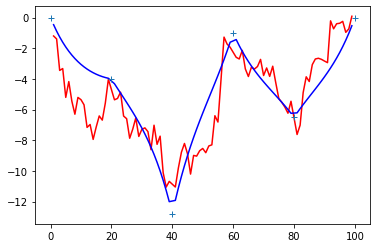

In [101]:
affichage_mixte()

Question 8 : Maintenant que l'on peut estimer la profondeur du fond marin grâce aux observations il est possible d'estimer la longueur nécessaire pour le cable. Pour chaque étape de simulation on calcule la longueur du cable puis on fait une moyenne.

In [1]:
'''def longueur(m=1):
    S=0
    
    for k in range(m):
        #on créé une liste contenant toutes les profondeurs (observées et simulées)
        profondeur=list(var(depth, Delta, observation_indexes))
        j=0
        for i in observation_indexes:
            profondeur.insert(i,depth[j])
            j+=1
        
        s=0
        for i in range(len(profondeur)-1):
            s+=math.sqrt((profondeur[i+1]-profondeur[i])**2+Delta**2)
        
        S+=s
    
    return S/m'''

def longueur(profondeurs_inconnues): # j'ai découpé ta fonction en 2 : ici, on calcule la longueur du câbe en fonction de la liste des profondeurs...
    profondeur=list(profondeurs_inconnues)
    j=0
    for i in observation_indexes:
        profondeur.insert(i,depth[j])
        j+=1
        
    s=0
    for i in range(len(profondeur)-1):
        s+=math.sqrt((profondeur[i+1]-profondeur[i])**2+Delta**2)
    return s

In [62]:
def simu_longueur(m=1): # et là on fait m simulations et on fait la moyenne des longueurs
    S=0
    for i in range(m):
        profondeurs_inconnues = var(depth, Delta, observation_indexes)
        S+=longueur(profondeurs_inconnues)
    return S/m

print(simu_longueur(100))

501.7606770643305

Question 9 : Si on calcule la longueur associée à l'espérance conditionnelle, on obtient :

In [2]:
print(longueur(E_Y))

NameError: name 'simu_longueur' is not defined

On remarque que la longueur du câble pour l'espérance conditonnelle est bien plus faible que la longueur moyenne du câble. Cela s'explique par le fait que comme vu précedemment, prendre l'espérance lisse le fond marin et diminue alors directement la longueur du câble nécessaire. L'estimation faisant la moyenne des longueurs générées est plus précise et réaliste et évite l'effet dû au lissage.

Question 10 : On calcule maintenant la suite $M_n$ qui représente l'estimation de la longueur du cable faite à partir de $n$ simulations.

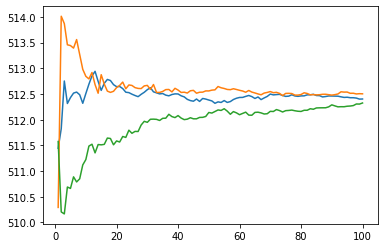

In [123]:
def Mn(m):
    L1=list()
    L2=list()
    L3=list()
    Somme1 = 0
    Somme2 = 0
    Somme3 = 0
    for i in range(1,m+1):
        l1 = simu_longueur(1)
        l2 = simu_longueur(1)
        l3 = simu_longueur(1)
        Somme1 += l1
        Somme2 += l2
        Somme3 += l3
        L1.append(Somme1/i)
        L2.append(Somme2/i)
        L3.append(Somme3/i)
    
    Li = [i for i in range(1,m+1)]
    
    plt.plot(Li,L1)
    plt.plot(Li,L2)
    plt.plot(Li,L3)
    plt.show()
        
Mn(100)

On remarque que d'une simulation à l'autre le début de la courbe varie légèrement mais que l'on tend toujours vers la même limite. Cela s'explique par le fait que les premiers termes de $M_n$ ne dépendent que du résultats de peu de simulations et sont donc plus variables.

Question 11 : On fait un histogramme des valeurs rencontrées pour la longueur du cable.

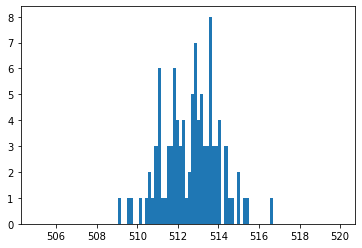

In [158]:
def histo(m):
    l=list()
    for i in range(m):
        #l.append(longueur())
        l.append(simu_longueur())
    plt.hist(l,range=(505,520),bins=100)
    
histo(100)

On remarque que la figure se rapproche d'une gaussiènne avec un légère asymétrie.

Question 12 : Une première méthode consiste à approximer la distribution des longueurs en une gaussiène d'espérance $\mu$. 

On calcule l'écart-type numériquement avec la formule $\sigma=\sqrt{\frac{1}{m}\sum_{i=0}^m (l_i-\mu)^2}$ où $l_i$ est la longueur obtenue à la i-ème simulation.

In [160]:
def approximation(l):#l est la liste contenant les simulations de longueur
    sigma=0
    s=0
    for i in (l):
        s+=i
    mu=s/len(l)
    
    S=0
    for i in (l):
        S+=(i-mu)**2
    
    sigma=math.sqrt(S/len(l))
    
    return (mu,sigma)

print(approximation([simu_longueur() for i in range(100)]))


(512.4303872520305, 1.494544227308713)


On fait maintenant les calculs avec la gaussiènne de paramètres ($\mu=512.3 , \sigma=1.5)$ (chiffres obtenus pour 10000 simulations).

On a une probabilité de 95% de trouver une longueur dans l'intervalle $[\mu-2\sigma,\mu+2\sigma]=[509.3, 
515.3]$

Une seconde méthode consiste à trouver cette intervalle numériquement sans approximer la fonction. On créer une liste qui contient les données de l'histogramme (nombre d'apparitions par intervalles). Cette liste correspond en quelquesorte à la fonction de densité discrète de la variable aléatoire longueur. En calculant l'aire sous cette densité on obtient une probabilité.

L'idée est d'agrandir progressivement un intervalle partant d'une valeut intermédiaire et s'arrêter lorsque l'aire dépasse 0.95.


L'inconvénient de cette méthode est qu'elle depend du pas choisi dans l'histogramme.


In [161]:
#on se place sur un intervalle [500,525] que l'on découpe en M=100 intervalles réguliers
delta=(525-500)/100

def liste_histo(l):
    L=[0 for i in range(101)]
    
    for i in l:#pour chaque élément de la liste on cherche dans quelle subdivision il se trouve et on incrémente le compteur associé dans L
        for j in range(100):
            if 500+j*delta<=i<500+(j+1)*delta:
                L[j]+=1/100 #la division sert à normaliser l'aire sous la courbe
    return L
                

In [162]:
#on fait 100 simualtions 
def intervalle(L):
    k=0
    a=L[49]
    while a<0.95:
        k+=1
        a+=(L[49+k]+L[49-k])
    
    return (512.5-k*delta,512.5+delta*k)

In [164]:
# l=[longueur() for i in range(100)]
l=[simu_longueur() for i in range(100)]
intervalle(liste_histo(l))

(509.75, 515.25)

Question 13 : On réutilise l'approximation par une gaussiènne de la question précédente. On connait la densité de la gaussiènne qui vaut : $$f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)²}{2\sigma²}}$$

On intégre alors cette densité sur l'intervalle $]-\infty,525]$.

On sait que $\int_{-\infty}^{\mu}f(x)dx=\frac{1}{2}$

On intégre alors la partie restante numériquement avec une méthode des rectangles par exemple.

In [ ]:
#paramètre de la gaussiènne
mu1=512.3
sigma=1.5

In [ ]:
#fonction densité
def f(x):
    return (1/(math.sqrt(2*math.pi)*sigma)) * math.exp(-(x-mu1)**2/(2*sigma**2))


In [ ]:
#ntégration numérique par la méthode des rectangles
def integration_rectangle(a,b,n,f):
    S=0
    delta=(b-a)/(n-1)
    for i in range(n):
        S+=delta*f(a+delta*i)
    return S

In [ ]:
print(integration_rectangle(mu1,525,10000,f)+0.5)

Les approximations sont trop grossières pour pour voir donner un résultat précis. Cependant on voit que cette probabilité va tendre vers 1. Ainsi, la probabilité que la longueur du câble dépasse 525m est presque nulle.

In [157]:
# question 14:
print(simu_longueur(1000))
print(simu_longueur(10000))
print(simu_longueur(100000))

Mn(1000)
Mn(10000)
Mn(100000)

l=[simu_longueur() for i in range(1000)]
intervalle(liste_histo(l))
l=[simu_longueur() for i in range(10000)]
intervalle(liste_histo(l))
l=[simu_longueur() for i in range(100000)]
intervalle(liste_histo(l))

512.2867275886781
512.2963604838454
512.3175413447586


In [ ]:
On observe que plus le nombre de simulations est important,